In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '/home/wuqiang/Workspace/2_generative_model/3_DA_Gesture/2_ST_GCN/st-gcn-master/data/Kinetics/kinetics-skeleton/val_data.npy'

In [3]:
# find connection in the specified sequence, center 29 is in the position 15
limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
           [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], \
           [1, 16], [16, 18], [3, 17], [6, 18]]

In [4]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0],
          [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255],
          [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

In [5]:
data = np.load(data_path, mmap_mode='r')
demo_item = data[0,:2,:,:,0]

In [6]:
C,T,V = demo_item.shape

In [8]:
#for t in range(T):
#    frame_item = demo_item[:,t,:]

In [7]:
frame_item = demo_item[:,100,:]

In [8]:
frame_item.shape

(2, 18)

In [19]:
for k in range(len(limbSeq)-1):
    candA_idx = limbSeq[k][0]-1
    candB_idx = limbSeq[k][1]-1
    A_cor = frame_item[:,candA_idx] # (x,y) of the A point
    B_cor = frame_item[:,candB_idx]
    

In [9]:
A_x = int((frame_item[0,2]+0.5)*340)
A_y = int((frame_item[1,2]+0.5)*256)
B_x = int((frame_item[0,3]+0.5)*340)
B_y = int((frame_item[1,3]+0.5)*256)

In [10]:
height = 256
width = 340
blank_image = np.zeros((height,width,3), np.uint8)

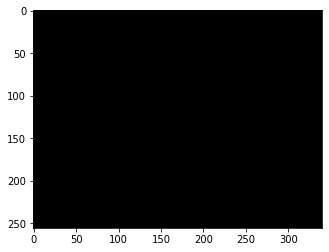

In [11]:
plt.imshow(blank_image)

In [12]:
A = (int(A_x), int(A_y))
B = (int(B_x), int(B_y))

mX

In [43]:
length = ((A_x-B_x)**2 + (A_y-B_y)**2)**0.5

In [44]:
import math

In [45]:
angle = math.degrees(math.atan2(A_x-B_x, A_y-B_y))
angle

56.309932474020215

In [46]:
polygon = cv2.ellipse2Poly(mP, (int(length/2),4), int(angle),0,360,1)

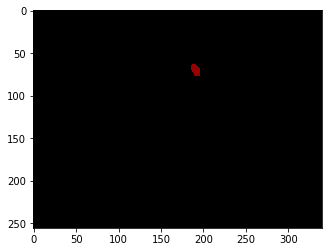

In [47]:
cur_image = blank_image.copy()
cv2.fillConvexPoly(cur_image, polygon, colors[0])
output = cv2.addWeighted(blank_image, 0.4, cur_image, 0.6, 0)
plt.imshow(output)

In [18]:
out = cv2.line(blank_image,A,B,colors[0],1)

In [53]:
def frame_visu(frame_item):
    height = 256
    width = 340
    out = np.zeros((height,width,3), np.uint8)
    for k in range(16):
        A_idx = limbSeq[k][0] - 1
        B_idx = limbSeq[k][1] - 1
        A_cor = frame_item[:, A_idx]
        B_cor = frame_item[:, B_idx]
        A_x = int((frame_item[0, A_idx] + 0.5) * 340)
        A_y = int((frame_item[1, A_idx] + 0.5) * 256)
        B_x = int((frame_item[0, B_idx] + 0.5) * 340)
        B_y = int((frame_item[1, B_idx] + 0.5) * 256)
        A = (int(A_x), int(A_y))
        B = (int(B_x), int(B_y))
        out = cv2.line(out,A,B,colors[k],1)
    return out

In [49]:
k = 18

In [50]:
height = 256
width = 340
A_idx = limbSeq[k][0] - 1
B_idx = limbSeq[k][1] - 1
A_cor = frame_item[:, A_idx]
B_cor = frame_item[:, B_idx]
A_x = int((frame_item[0, A_idx] + 0.5) * 340)
A_y = int((frame_item[1, A_idx] + 0.5) * 256)
B_x = int((frame_item[0, B_idx] + 0.5) * 340)
B_y = int((frame_item[1, B_idx] + 0.5) * 256)
A = (int(A_x), int(A_y))
B = (int(B_x), int(B_y))
out = cv2.line(out,A,B,colors[k],1)
plt.imshow(out)

IndexError: list index out of range

In [54]:
out = frame_visu(frame_item)

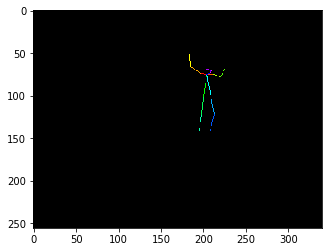

In [55]:
plt.imshow(out)